In [ ]:
pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 18.1MB/s 
     |████████████████████████████████| 14.7MB 293kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import requests
import shapely
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
delhi = gpd.read_file('/content/drive/My Drive/Colab Notebooks/new_delhi_wards.json')

# **Delhi data description**

In [ ]:
delhi.head()

,WARD_NO,WARD_NAME,MOVEMENT_ID,DISPLAY_NAME,geometry
0,CANT_1,DELHI CANTT CHARGE 1,1,"300 Ring Road, Block CB, Naraina Village, Nara...","POLYGON ((77.13228 28.63154, 77.13644 28.62062..."
1,CANT_2,DELHI CANTT CHARGE 2,2,"Unnamed Road, Delhi Cantonment, New Delhi","POLYGON ((77.15429 28.62335, 77.15501 28.62228..."
2,CANT_4,DELHI CANTT CHARGE 4,3,"Unnamed Road, Mahipalpur, New Delhi","POLYGON ((77.15755 28.57578, 77.15672 28.57564..."
3,CANT_5,DELHI CANTT CHARGE 5,4,"P-268/3, Rock View, Delhi Cantonment, Delhi","POLYGON ((77.13480 28.57051, 77.13429 28.57048..."
4,CANT_6,DELHI CANTT CHARGE 6,5,"Old Palam Road, Delhi Cantonment, New Delhi","POLYGON ((77.12157 28.59308, 77.12878 28.59029..."


In [ ]:
delhi.shape

(290, 5)

Total No. of rows= 290   
Total No. of columns=5

In [ ]:
delhi.dtypes

WARD_NO           object
WARD_NAME         object
MOVEMENT_ID       object
DISPLAY_NAME      object
geometry        geometry
dtype: object

In [ ]:
print(delhi.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   WARD_NO       289 non-null    object  
 1   WARD_NAME     289 non-null    object  
 2   MOVEMENT_ID   290 non-null    object  
 3   DISPLAY_NAME  290 non-null    object  
 4   geometry      290 non-null    geometry
dtypes: geometry(1), object(4)
memory usage: 11.5+ KB
None


In [ ]:
delhi.apply(lambda x: sum(x.isnull()),axis=0)

WARD_NO         1
WARD_NAME       1
MOVEMENT_ID     0
DISPLAY_NAME    0
geometry        0
dtype: int64

In [ ]:
delhi.apply(lambda x: x.nunique(),axis=0)

WARD_NO         289
WARD_NAME       288
MOVEMENT_ID     290
DISPLAY_NAME    290
geometry        290
dtype: int64

In [ ]:
is_NaN = delhi.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = delhi[row_has_NaN]
rows_with_NaN

,WARD_NO,WARD_NAME,MOVEMENT_ID,DISPLAY_NAME,geometry
192,None,None,193,"Unnamed Road, Usmanpur, Shahdara, Delhi","POLYGON ((77.24296 28.75579, 77.24326 28.75481..."


# **Exploratory data analysis of delhi**

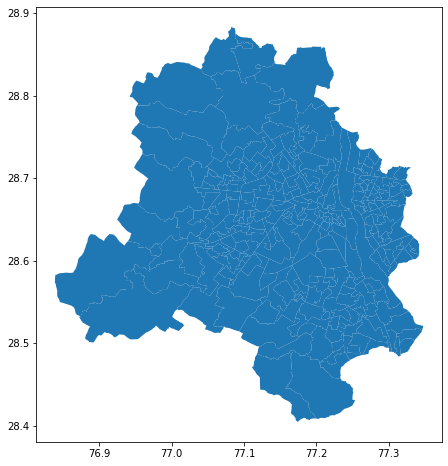

In [ ]:
delhi.plot(figsize=(8,8))

This is the map of delhi

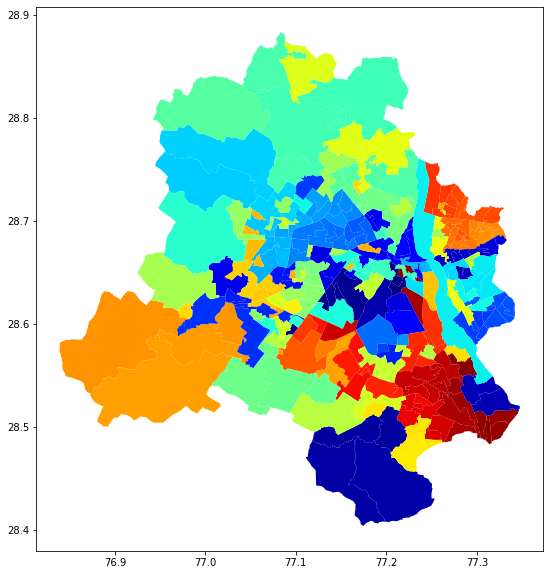

In [ ]:
delhi.plot(cmap='jet',column='MOVEMENT_ID',figsize=(10,10))



These are the different wards with different movement_id



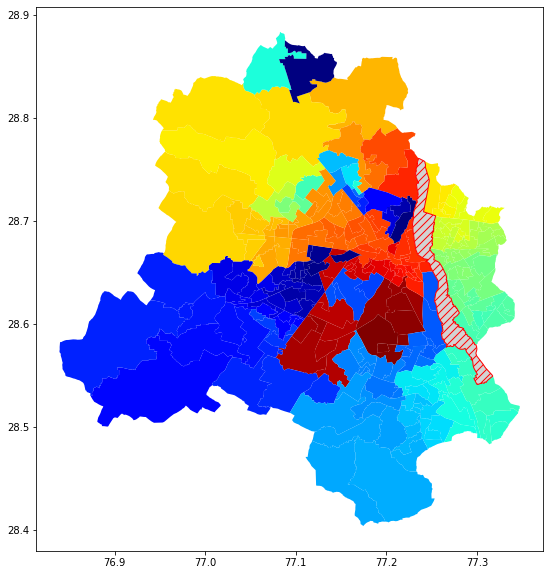

In [ ]:
delhi.plot(cmap='jet',column='WARD_NO',figsize=(10,10),missing_kwds={
            "color": "lightgrey",
            "edgecolor": "red",
            "hatch": "///",
            "label": "Missing values",
        })

* Above map is devided on the basis of WARD_NO.
* The missing value is depicted by hatched-lines.



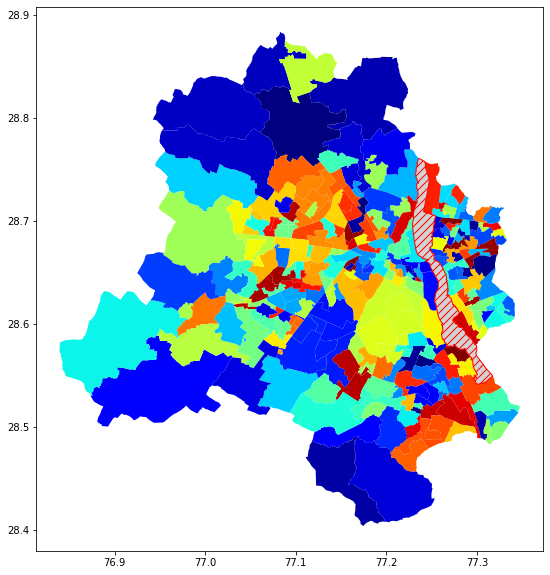

In [ ]:
delhi.plot(cmap='jet',column='WARD_NAME',figsize=(10,10),missing_kwds={
            "color": "lightgrey",
            "edgecolor": "red",
            "hatch": "///",
            "label": "Missing values",})

* Above map is devided on the basis of WARD_NAME.
* The missing value is depicted by hatched-lines.

In [ ]:
delhi_c=delhi.copy()

In [ ]:
delhi_c.geometry=delhi_c['geometry'].centroid
delhi_c.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


,WARD_NO,WARD_NAME,MOVEMENT_ID,DISPLAY_NAME,geometry
0,CANT_1,DELHI CANTT CHARGE 1,1,"300 Ring Road, Block CB, Naraina Village, Nara...",POINT (77.13180 28.62141)
1,CANT_2,DELHI CANTT CHARGE 2,2,"Unnamed Road, Delhi Cantonment, New Delhi",POINT (77.14289 28.61059)
2,CANT_4,DELHI CANTT CHARGE 4,3,"Unnamed Road, Mahipalpur, New Delhi",POINT (77.14556 28.56317)
3,CANT_5,DELHI CANTT CHARGE 5,4,"P-268/3, Rock View, Delhi Cantonment, Delhi",POINT (77.13216 28.57656)
4,CANT_6,DELHI CANTT CHARGE 6,5,"Old Palam Road, Delhi Cantonment, New Delhi",POINT (77.10751 28.57027)


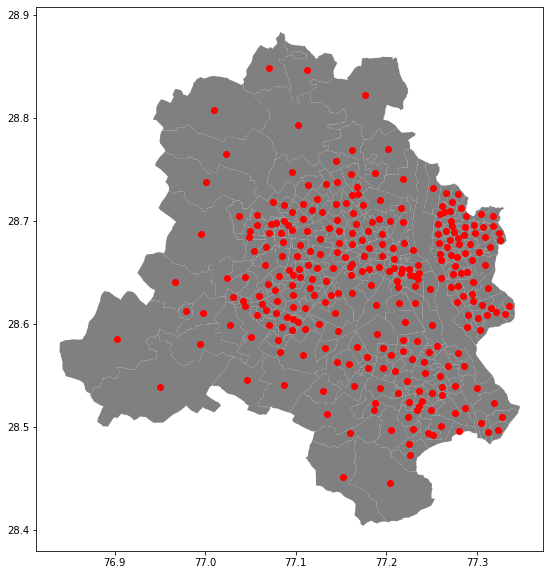

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
delhi.plot(color='grey',ax=ax)
delhi_c.plot(color='red',ax=ax)

This is the map of delhi depicting the centroid of each ward by a red dot.

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# New-delhi wards 2019(quater-2) All-Hourly-Aggregate

In [ ]:
dt=pd.read_csv('/content/drive/My Drive/Colab Notebooks/new_delhi-wards-2019-2-All-HourlyAggregate.csv')

In [ ]:
dt

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,1,1,23,233.60,639.32,109.92,2.42
1,1,2,0,201.43,259.96,161.71,1.69
2,1,2,1,179.93,238.72,140.51,1.73
3,1,2,2,165.50,206.68,131.22,1.68
4,1,2,3,158.29,195.70,128.20,1.63
...,...,...,...,...,...,...,...
1455927,290,279,16,2281.00,343.19,2257.46,1.15
1455928,290,279,17,2848.11,783.17,2757.05,1.28
1455929,290,281,15,1937.00,257.34,1920.67,1.14
1455930,290,281,16,2190.38,320.22,2169.06,1.15


**Data discription**



In [ ]:
dt.shape

(1455932, 7)

total no. of rows=14,55,932   
total no. of columns=7

In [ ]:
dt.dtypes

sourceid                                      int64
dstid                                         int64
hod                                           int64
mean_travel_time                            float64
standard_deviation_travel_time              float64
geometric_mean_travel_time                  float64
geometric_standard_deviation_travel_time    float64
dtype: object

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455932 entries, 0 to 1455931
Data columns (total 7 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   sourceid                                  1455932 non-null  int64  
 1   dstid                                     1455932 non-null  int64  
 2   hod                                       1455932 non-null  int64  
 3   mean_travel_time                          1455932 non-null  float64
 4   standard_deviation_travel_time            1455932 non-null  float64
 5   geometric_mean_travel_time                1455932 non-null  float64
 6   geometric_standard_deviation_travel_time  1455932 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 77.8 MB




* Above are the data types of each columns.
* There are no null values.



In [ ]:
dt.apply(lambda x: x.nunique(),axis=0)

sourceid                                       290
dstid                                          290
hod                                             24
mean_travel_time                            419407
standard_deviation_travel_time              126617
geometric_mean_travel_time                  428278
geometric_standard_deviation_travel_time       585
dtype: int64

These are the list of columns with their no. of unique values.

In [ ]:
dt.describe()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
count,1.455932e+06,1.455932e+06,1.455932e+06,1.455932e+06,1.455932e+06,1.455932e+06,1.455932e+06
mean,1.446230e+02,1.449223e+02,1.209535e+01,2.171961e+03,5.642965e+02,2.103068e+03,1.331329e+00
std,8.346953e+01,8.328118e+01,6.777163e+00,1.101455e+03,2.373708e+02,1.095850e+03,2.562102e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,2.170000e+01,7.000000e-01,7.720000e+00,1.000000e+00
25%,7.100000e+01,7.200000e+01,7.000000e+00,1.342550e+03,4.041900e+02,1.279080e+03,1.220000e+00
50%,1.470000e+02,1.470000e+02,1.200000e+01,2.047935e+03,5.294300e+02,1.982320e+03,1.270000e+00
75%,2.180000e+02,2.180000e+02,1.800000e+01,2.884803e+03,6.803900e+02,2.813630e+03,1.360000e+00
max,2.900000e+02,2.900000e+02,2.300000e+01,1.013800e+04,3.975500e+03,9.970000e+03,1.513000e+01


# Univariate Analysis

Text(0.5, 1.0, 'sourceid distribution')

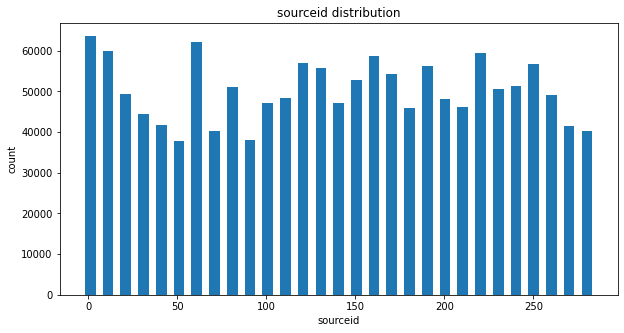

In [ ]:
hist, edges = np.histogram(dt['sourceid'],bins=29)
plt.figure(figsize=[10,5])

plt.bar(edges[:-1], hist, width = 6,)
plt.xlabel('sourceid')
plt.ylabel('count')
plt.title('sourceid distribution')

Text(0.5, 1.0, 'dstid distribution')

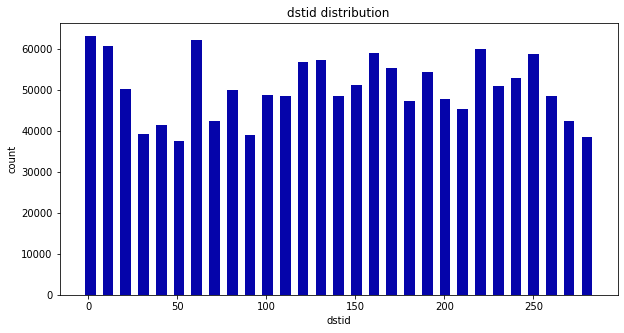

In [ ]:
hist, edges = np.histogram(dt['dstid'],bins=29)
plt.figure(figsize=[10,5])

plt.bar(edges[:-1], hist, width = 6, color='#0504aa')
plt.xlabel('dstid')
plt.ylabel('count')
plt.title('dstid distribution')

Text(0.5, 1.0, 'sourceid and dstid distribution')

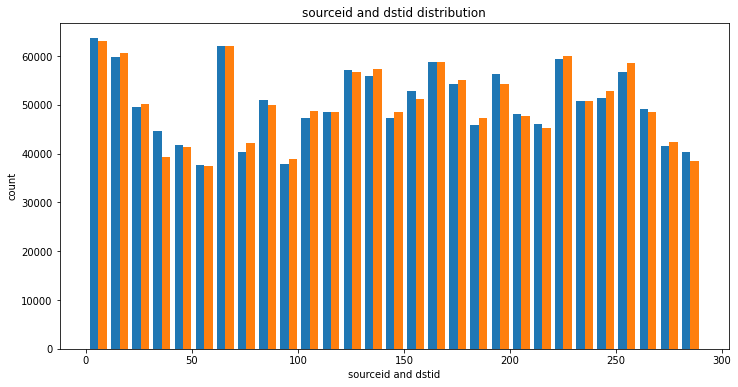

In [ ]:
plt.figure(figsize=[12,6])
n, bins, patches = plt.hist([dt['sourceid'], dt['dstid']], bins=29)
plt.xlabel('sourceid and dstid')
plt.ylabel('count')
plt.title('sourceid and dstid distribution')

Text(0.5, 1.0, 'hour-of-day distribution')

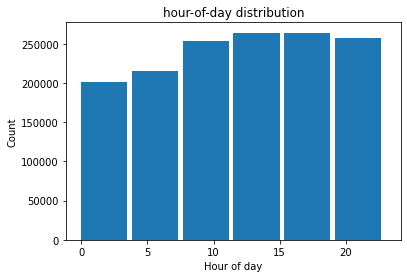

In [ ]:
dt.hod.plot.hist(bins=6, width=3.5)
plt.xlabel('Hour of day')
plt.ylabel('Count')
plt.title('hour-of-day distribution')

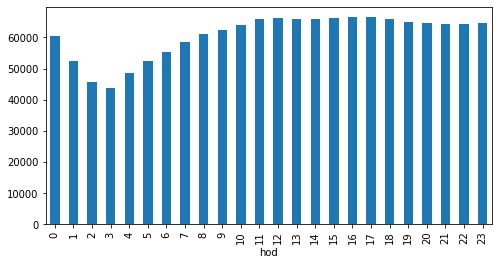

In [ ]:
g=dt.groupby(["hod"])
size=g.size()
plt.figure(figsize=(8,4))
size.plot(kind='bar')
plt.xlabel('Hour of day')
plt.ylabel('Count')
plt.title('hour-of-day distribution')

* There are few peak hours when the most no. of uber cabs are booked.


Text(0.5, 1.0, 'hour-of-day distribution')

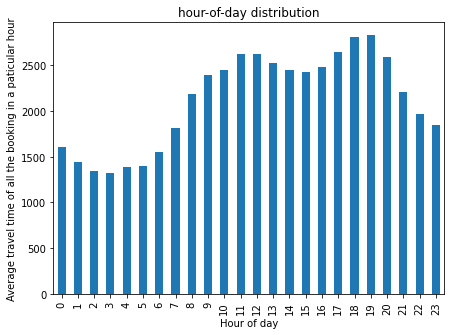

In [ ]:
plt.figure(figsize=[7,5])
g1=dt.groupby(by='hod').mean_travel_time.mean()
g1.plot(kind='bar')
plt.xlabel('Hour of day')
plt.ylabel('Average travel time of all the booking in a paticular hour')
plt.title('hour-of-day distribution')

Text(0.5, 1.0, 'mean_travel_time distribution')

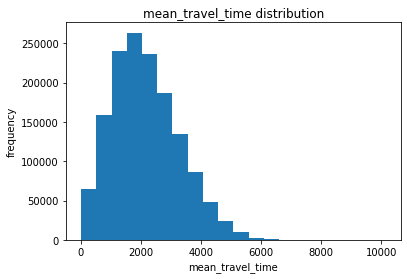

In [ ]:
dt.mean_travel_time.plot.hist(bins=20)
plt.xlabel('mean_travel_time')
plt.ylabel('frequency')
plt.title('mean_travel_time distribution')

Text(0.5, 1.0, 'standard_deviation_travel_time distribution')

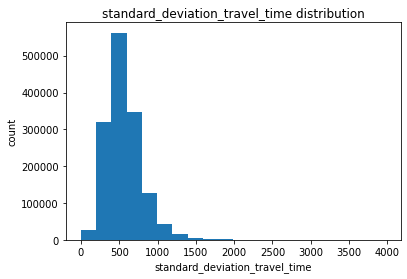

In [ ]:
dt.standard_deviation_travel_time.plot.hist(bins=20)
plt.xlabel('standard_deviation_travel_time')
plt.ylabel('count')
plt.title('standard_deviation_travel_time distribution')

Text(0.5, 1.0, 'geometry_mean_travel_time distribution')

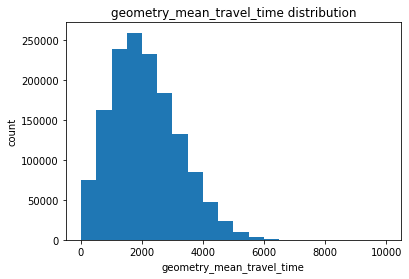

In [ ]:
dt.geometric_mean_travel_time.plot.hist(bins=20)
plt.xlabel('geometry_mean_travel_time')
plt.ylabel('count')
plt.title('geometry_mean_travel_time distribution')

Text(0.5, 1.0, 'geometric_standard_deviation_travel_time distribution')

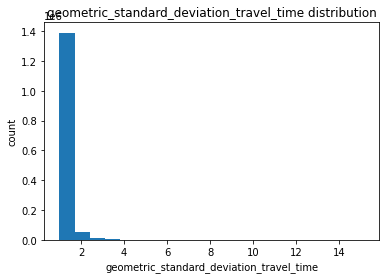

In [ ]:
dt.geometric_standard_deviation_travel_time.plot.hist(bins=20)
plt.xlabel('geometric_standard_deviation_travel_time')
plt.ylabel('count')
plt.title('geometric_standard_deviation_travel_time distribution')

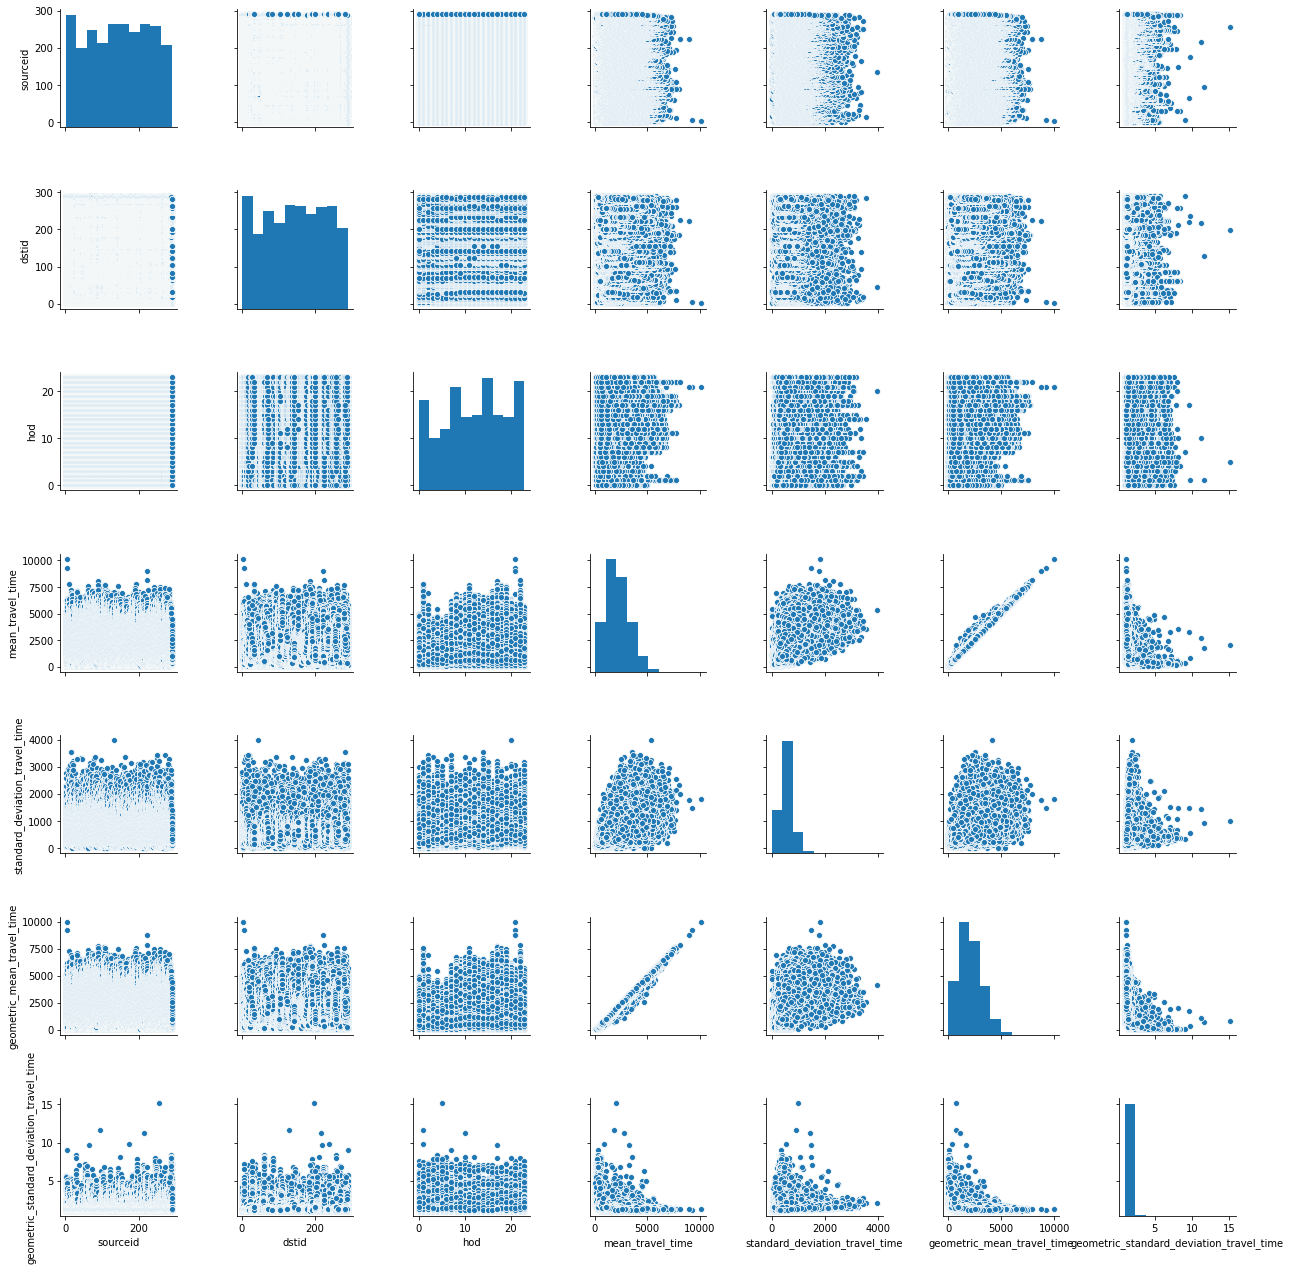

In [ ]:
sns.pairplot(dt)

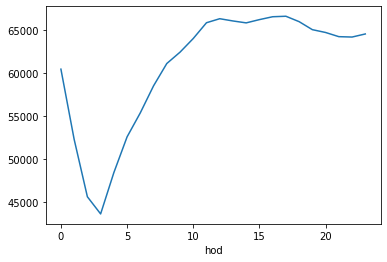

In [ ]:
g2=dt.groupby(by='hod').sourceid.count()
g2.plot()

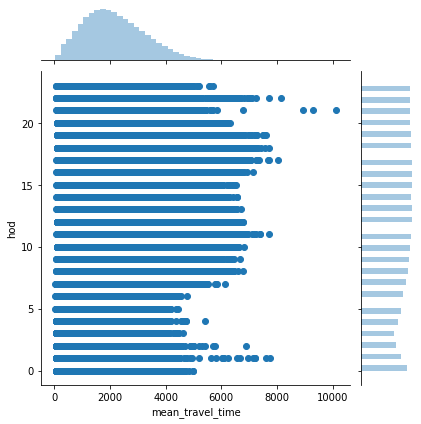

In [ ]:
sns.jointplot(x='mean_travel_time',y='hod',data=dt,kind="scatter",)

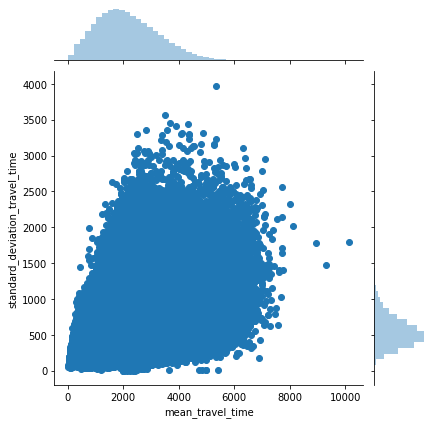

In [ ]:
sns.jointplot(x='mean_travel_time',y='standard_deviation_travel_time',data=dt,kind="scatter",)

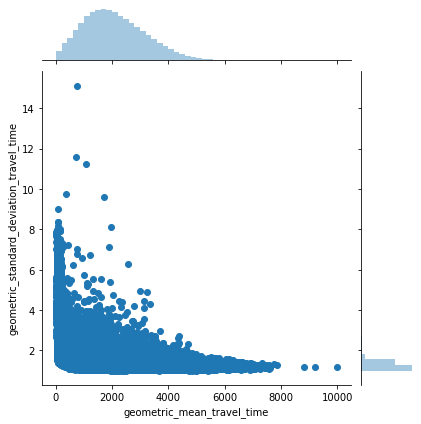

In [ ]:
sns.jointplot(x='geometric_mean_travel_time',y='geometric_standard_deviation_travel_time',data=dt,kind='scatter')

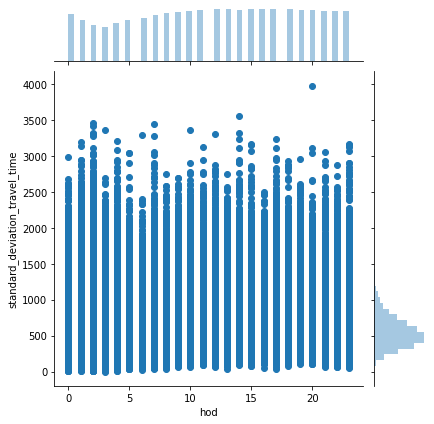

In [ ]:
sns.jointplot(y='standard_deviation_travel_time',x='hod',data=dt,kind="scatter",)

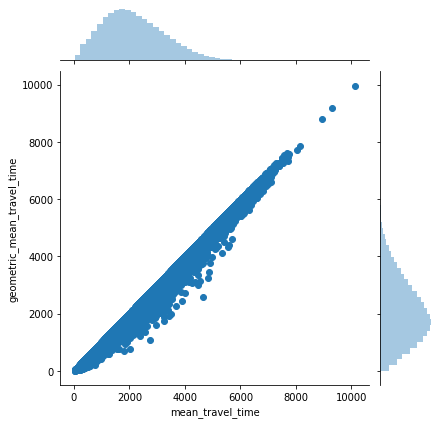

In [ ]:
sns.jointplot(x='mean_travel_time',y='geometric_mean_travel_time',data=dt,kind="scatter",)

In [ ]:
dt.corr()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
sourceid,1.000000,0.013620,-0.002375,-0.004128,-0.009990,-0.004020,0.001491
dstid,0.013620,1.000000,0.000332,-0.000087,0.003564,-0.000334,0.001614
hod,-0.002375,0.000332,1.000000,0.286115,0.208782,0.285225,-0.084769
mean_travel_time,-0.004128,-0.000087,0.286115,1.000000,0.649684,0.999282,-0.473329
standard_deviation_travel_time,-0.009990,0.003564,0.208782,0.649684,1.000000,0.623498,-0.086798
geometric_mean_travel_time,-0.004020,-0.000334,0.285225,0.999282,0.623498,1.000000,-0.491597
geometric_standard_deviation_travel_time,0.001491,0.001614,-0.084769,-0.473329,-0.086798,-0.491597,1.000000


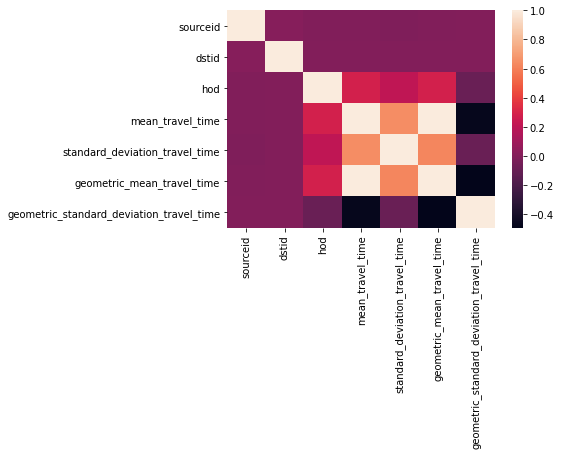

In [ ]:
sns.heatmap(dt.corr())